In [1]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download('INFY.NS', start = '2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2020-01-01,655.615295,658.418043,651.789364,653.969272,2112415
2020-01-02,653.702271,659.129748,650.321216,657.439248,5658200
2020-01-03,663.756592,665.536100,652.990588,652.990588,7882938
2020-01-06,657.394836,670.696672,655.303936,663.845554,6519403
2020-01-07,647.652100,660.731443,645.160744,656.638595,7899363
...,...,...,...,...,...
2025-02-04,1898.800049,1911.199951,1875.000000,1889.000000,7334787
2025-02-05,1897.050049,1919.699951,1894.300049,1906.000000,4996744


In [3]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df.tail(20)

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-15,1949.650024,1958.050049,1937.099976,1947.000000,2985439
2025-01-16,1928.449951,1966.949951,1916.849976,1965.949951,7533579
2025-01-17,1815.449951,1858.000000,1812.000000,1851.000000,16409953
2025-01-20,1813.300049,1827.949951,1793.150024,1822.949951,4333011
2025-01-21,1800.699951,1831.650024,1793.050049,1819.050049,7169109
2025-01-22,1856.449951,1865.800049,1805.150024,1807.400024,8373913
2025-01-23,1865.449951,1879.550049,1852.699951,1858.000000,5907471
2025-01-24,1875.449951,1894.900024,1864.250000,1865.500000,4887027
2025-01-27,1822.000000,1863.000000,1812.000000,1848.750000,7652371


In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0        655.615295
1        653.702271
2        663.756592
3        657.394836
4        647.652100
           ...     
1263    1898.800049
1264    1897.050049
1265    1915.650024
1266    1903.650024
1267    1889.050049
Name: close, Length: 1268, dtype: float64

In [5]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(1889.050048828125)

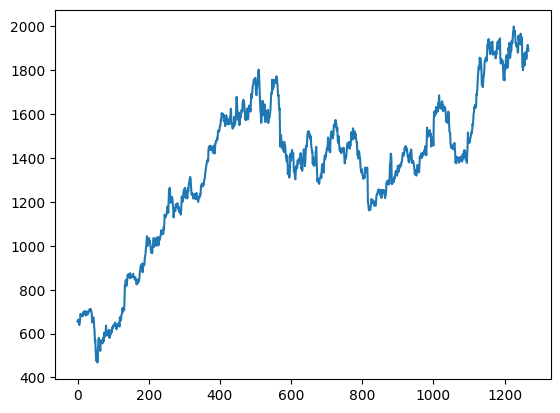

In [6]:
plt.plot(df)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
df

array([[0.1222527 ],
       [0.12100341],
       [0.12756933],
       ...,
       [0.94511164],
       [0.93727511],
       [0.92774067]])

In [9]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [10]:
training_size, test_size

(1014, 254)

In [11]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [14]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

In [16]:
from keras.models import load_model

In [ ]:
model.save('Infosys_Pred_model.h5')

In [17]:
model = load_model('Model/Infosys_Pred_model.h5')

In [18]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [19]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1330.9691897661123

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

1762.84149402698

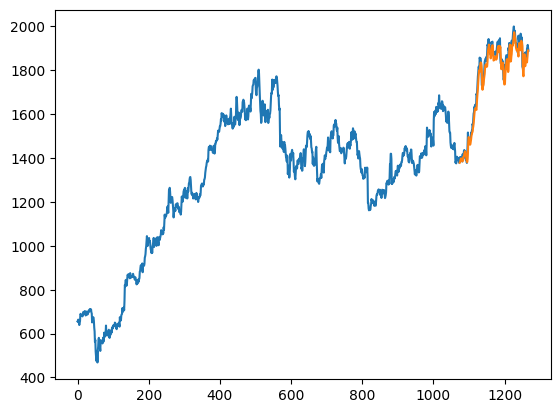

In [21]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()